## Assignment 1


### Question 4

4. Do a classification with KNN and your data set for classification. With normalized input data, find best "K" and "p" (norm; the metric you can choose) to see the same behaviour for training and validation sets, i.e., to see that the metrics described in (020-KNN-Classification-Alfalfa.ipynb) show "similar" values (i.e., avoiding underfitting and overfitting). After finding the best "K" and "p", use them for your data when the input is not normalized. Again, see if the metrics show '" similar" values.

### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing, regressors, feature extraction
* seaborn just to have a nice plotting surface

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets, metrics, model_selection, svm

# Use seaborn to set the plotting style
sns.set_style('whitegrid')

print('Packages imported.')

Packages imported.


### Load the data and display the first 5 rows. Additionally, look at the column information to see if cleaning is necessary

In [2]:
# Load the cancer data using pandas
cancer_data = pd.read_csv('breast_cancer.csv')

# Display the first 5 rows of data
cancer_data.head(n=5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Get the features and target we want (discard the patient ID numbers for now)

In [4]:
# Get the data without the ID number
data = cancer_data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
                    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
                    'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
                    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
                    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', ]].values

### Now, the target is binary, but set to 'B' or 'M', we need to set it to 0 or 1.
### B = 0
### M = 1

In [5]:
# Check the number of M and B
print(f'Number of M before: {len(np.squeeze(np.argwhere(data[:, 0] == "M")))}')
print(f'Number of B before: {len(np.squeeze(np.argwhere(data[:, 0] == "B")))}')
print()

# Set B to 0
data[:, 0][data[:, 0] == 'B'] = 0

# Set M to 1
data[:, 0][data[:, 0] == 'M'] = 1
print(f'Target shape: {np.shape(data[:, 0])}')

# Check it's the same number afterwards
print(f'Number of M after: {len(np.squeeze(np.argwhere(data[:, 0] == 1)))}')
print(f'Number of B after: {len(np.squeeze(np.argwhere(data[:, 0] == 0)))}')


Number of M before: 212
Number of B before: 357

Target shape: (569,)
Number of M after: 212
Number of B after: 357


### We still have the same number of M and B diagnoses after changing M to be 1 and B to be 0

### Randomly separate the data into the training and validation set. Training (70%), Validation (30%).

In [6]:
# Separate the input and target and training and validation
input_tr, input_va, target_tr, target_va = train_test_split(data[:, 1:], data[:, 0], test_size=0.3)

# Set target to definitely be an integer, otherwise the classifier doesn't like it
target_tr = np.array(target_tr, dtype='int')
target_va = np.array(target_va, dtype='int')

# Print the new sizes of the various training and validation sets
print(f'Training set shapes: Input: {np.shape(input_tr)}, Target: {np.shape(target_tr)}')
print(f'Validation set shapes: Input: {np.shape(input_va)}, Target: {np.shape(target_va)}')

Training set shapes: Input: (398, 30), Target: (398,)
Validation set shapes: Input: (171, 30), Target: (171,)


### Now, we'll look at the distribution of the various features before normalization. 

col_num is the column number of the feature to compare between test and validation

Text(0.5, 1.0, 'Validation set')

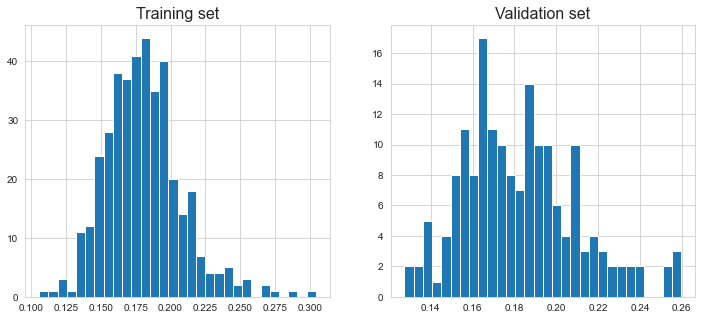

In [7]:
# The column of the input data to examine
col_num = 8

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr[:, col_num], bins=30)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va[:, col_num], bins=30)
ax[1].set_title('Validation set', fontsize=16)

## Normalize the input data.

In [8]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_tr)
input_tr_norm = stnd_scaler.transform(input_tr)  # Normalize training data
input_va_norm = stnd_scaler.transform(input_va)  # Normalize the validation data

## Show the histograms again after normalization

Text(0.5, 1.0, 'Validation set')

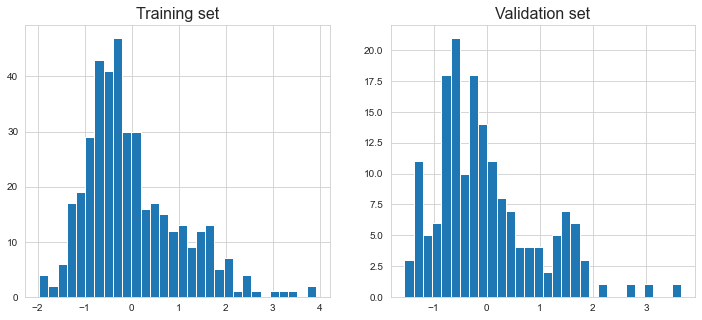

In [9]:
# Examine the input data after normalization for both the training and validation sets

# The column of the input data to examine
col_num = 2

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr_norm[:, col_num], bins=30)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va_norm[:, col_num], bins=30)
ax[1].set_title('Validation set', fontsize=16)

### The various feature distributions behave roughly the same before and after normalization, though we don't have a lot of data so it's a little hard to tell in some cases. But we should be good to use the data in our model.

### We'll now set up the KNN classifier and go through a number of k- and p-values to determine the pair that gives us the best model performance based on accuracy, precision, recall, etc. and their combinations as well the confusion matrix.

k = 1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 50

p = 1, 2

In [10]:
# Define the k- and p-values to iterate through
k_vals = [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 50]
p_vals = [1, 2]

# Set up the arrays to hold the various training and validation set probabilities and predictions
target_tr_prob = np.zeros((2, len(k_vals), np.shape(target_tr)[0]))  # Training probability values
target_tr_pred = np.zeros((2, len(k_vals), np.shape(target_tr)[0]))  # Training prediction values

target_va_prob = np.zeros((2, len(k_vals), np.shape(target_va)[0]))  # Validation probability values
target_va_pred = np.zeros((2, len(k_vals), np.shape(target_va)[0]))  # Validation prediction values


for p_idx, p in enumerate(p_vals):
    for k_idx, k in enumerate(k_vals):
        
        # The KNN classifier, with n_neighbors = k and p = p
        reg_temp = KNeighborsClassifier(n_neighbors=k, p=p)
    
        # Fit the model with the normalized training set
        reg_temp.fit(input_tr_norm, target_tr) 

        # Use the classifier to predict the results for training and validation sets, along with the probabilities
        target_tr_prob[p_idx, k_idx] = reg_temp.predict_proba(input_tr_norm)[:, 1] 
        target_tr_pred[p_idx, k_idx] = reg_temp.predict(input_tr_norm)
        
        target_va_prob[p_idx, k_idx] = reg_temp.predict_proba(input_va_norm)[:, 1] 
        target_va_pred[p_idx, k_idx] = reg_temp.predict(input_va_norm)
        

print('Finished running.')

# Set the indices where the training and validation sets equal 1 and 0
idx_tr_1 = (target_tr==1)
idx_tr_0 = (target_tr==0)


idx_va_1 = (target_va==1)
idx_va_0 = (target_va==0)


Finished running.


### Go through the the various pairs and calculate the ROC AUC, recall, accuracy, and precision and then plot them

In [11]:
# Initialize the arrays for the AUC ROC, recall, accuracy, and precision
auc_tr = np.zeros((2, len(k_vals))) # AUC for training set
auc_va = np.zeros((2, len(k_vals))) # AUC for validation set

accur_tr = np.zeros((2, len(k_vals))) # accuracy for training set
accur_va = np.zeros((2, len(k_vals))) # accuracy for validation set

prec_tr = np.zeros((2, len(k_vals))) # precision for training set
prec_va = np.zeros((2, len(k_vals))) # precision for validation set

rec_tr = np.zeros((2, len(k_vals))) # recall for training set
rec_va = np.zeros((2, len(k_vals))) # recall for validation set

# Go through all the pairs
for p_idx, p in enumerate(p_vals):
    for k_idx, k in enumerate(k_vals):
        auc_tr[p_idx, k_idx] = metrics.roc_auc_score(target_tr, target_tr_prob[p_idx, k_idx], average=None)
        auc_va[p_idx, k_idx] = metrics.roc_auc_score(target_va, target_va_prob[p_idx, k_idx], average=None)
        
        accur_tr[p_idx, k_idx] = metrics.accuracy_score(target_tr, target_tr_pred[p_idx, k_idx])
        accur_va[p_idx, k_idx] = metrics.accuracy_score(target_va, target_va_pred[p_idx, k_idx])
        
        prec_tr[p_idx, k_idx] = metrics.precision_score(target_tr, target_tr_pred[p_idx, k_idx])
        prec_va[p_idx, k_idx] = metrics.precision_score(target_va, target_va_pred[p_idx, k_idx])
        
        rec_tr[p_idx, k_idx] = metrics.recall_score(target_tr, target_tr_pred[p_idx, k_idx])
        rec_va[p_idx, k_idx] = metrics.recall_score(target_va, target_va_pred[p_idx, k_idx])

print('Finished calculating.')

Finished calculating.


### Plot the ROC AUC for both p = 1 and p = 2. The first row plots both the validation and training set results for the various values of k. The second row plots the difference between the training and validation results.

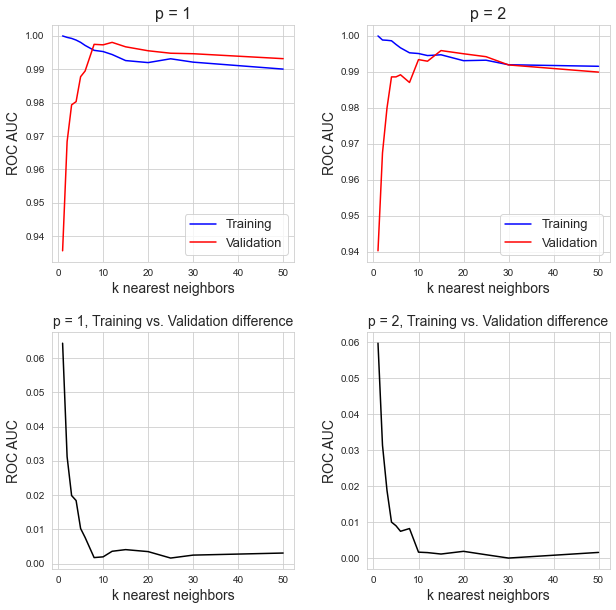

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].plot(k_vals, auc_tr[0], color='b')
ax[0, 0].plot(k_vals, auc_va[0], color='r')
ax[0, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 0].set_ylabel('ROC AUC', fontsize=14)
ax[0, 0].set_title('p = 1', fontsize=16)
ax[0, 0].legend(['Training', 'Validation'], fontsize=13)

ax[0, 1].plot(k_vals, auc_tr[1], color='b')
ax[0, 1].plot(k_vals, auc_va[1], color='r')
ax[0, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 1].set_ylabel('ROC AUC', fontsize=14)
ax[0, 1].set_title('p = 2', fontsize=16)
ax[0, 1].legend(['Training', 'Validation'], fontsize=13)

ax[1, 0].plot(k_vals, np.abs(auc_tr[0] - auc_va[0]), color='black')
ax[1, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 0].set_ylabel('ROC AUC', fontsize=14)
ax[1, 0].set_title('p = 1, Training vs. Validation difference', fontsize=14)

ax[1, 1].plot(k_vals, np.abs(auc_tr[1] - auc_va[1]), color='black')
ax[1, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 1].set_ylabel('ROC AUC', fontsize=14)
ax[1, 1].set_title('p = 2, Training vs. Validation difference', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Plot the Recall for both p = 1 and p = 2. The first row plots both the validation and training set results for the various values of k. The second row plots the difference between the training and validation results.

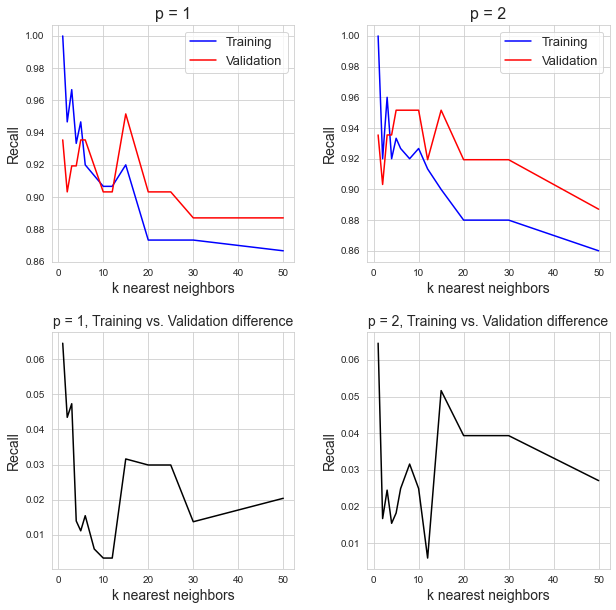

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].plot(k_vals, rec_tr[0], color='b')
ax[0, 0].plot(k_vals, rec_va[0], color='r')
ax[0, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 0].set_ylabel('Recall', fontsize=14)
ax[0, 0].set_title('p = 1', fontsize=16)
ax[0, 0].legend(['Training', 'Validation'], fontsize=13)

ax[0, 1].plot(k_vals, rec_tr[1], color='b')
ax[0, 1].plot(k_vals, rec_va[1], color='r')
ax[0, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 1].set_ylabel('Recall', fontsize=14)
ax[0, 1].set_title('p = 2', fontsize=16)
ax[0, 1].legend(['Training', 'Validation'], fontsize=13)

ax[1, 0].plot(k_vals, np.abs(rec_tr[0] - rec_va[0]), color='black')
ax[1, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 0].set_ylabel('Recall', fontsize=14)
ax[1, 0].set_title('p = 1, Training vs. Validation difference', fontsize=14)

ax[1, 1].plot(k_vals, np.abs(rec_tr[1] - rec_va[1]), color='black')
ax[1, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 1].set_ylabel('Recall', fontsize=14)
ax[1, 1].set_title('p = 2, Training vs. Validation difference', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Plot the Accuracy for both p = 1 and p = 2. The first row plots both the validation and training set results for the various values of k. The second row plots the difference between the training and validation results.

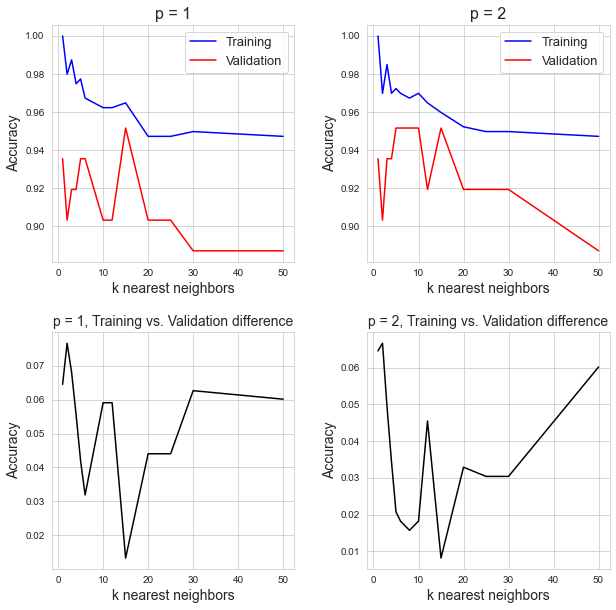

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].plot(k_vals, accur_tr[0], color='b')
ax[0, 0].plot(k_vals, rec_va[0], color='r')
ax[0, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 0].set_ylabel('Accuracy', fontsize=14)
ax[0, 0].set_title('p = 1', fontsize=16)
ax[0, 0].legend(['Training', 'Validation'], fontsize=13)

ax[0, 1].plot(k_vals, accur_tr[1], color='b')
ax[0, 1].plot(k_vals, rec_va[1], color='r')
ax[0, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 1].set_ylabel('Accuracy', fontsize=14)
ax[0, 1].set_title('p = 2', fontsize=16)
ax[0, 1].legend(['Training', 'Validation'], fontsize=13)

ax[1, 0].plot(k_vals, np.abs(accur_tr[0] - rec_va[0]), color='black')
ax[1, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 0].set_ylabel('Accuracy', fontsize=14)
ax[1, 0].set_title('p = 1, Training vs. Validation difference', fontsize=14)

ax[1, 1].plot(k_vals, np.abs(accur_tr[1] - rec_va[1]), color='black')
ax[1, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 1].set_ylabel('Accuracy', fontsize=14)
ax[1, 1].set_title('p = 2, Training vs. Validation difference', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Plot the Precision for both p = 1 and p = 2. The first row plots both the validation and training set results for the various values of k. The second row plots the difference between the training and validation results.

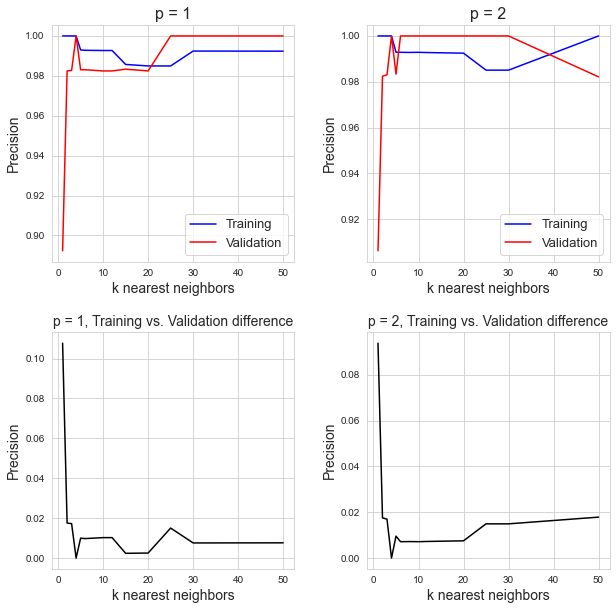

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].plot(k_vals, prec_tr[0], color='b')
ax[0, 0].plot(k_vals, prec_va[0], color='r')
ax[0, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 0].set_ylabel('Precision', fontsize=14)
ax[0, 0].set_title('p = 1', fontsize=16)
ax[0, 0].legend(['Training', 'Validation'], fontsize=13)

ax[0, 1].plot(k_vals, prec_tr[1], color='b')
ax[0, 1].plot(k_vals, prec_va[1], color='r')
ax[0, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[0, 1].set_ylabel('Precision', fontsize=14)
ax[0, 1].set_title('p = 2', fontsize=16)
ax[0, 1].legend(['Training', 'Validation'], fontsize=13)

ax[1, 0].plot(k_vals, np.abs(prec_tr[0] - prec_va[0]), color='black')
ax[1, 0].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 0].set_ylabel('Precision', fontsize=14)
ax[1, 0].set_title('p = 1, Training vs. Validation difference', fontsize=14)

ax[1, 1].plot(k_vals, np.abs(prec_tr[1] - prec_va[1]), color='black')
ax[1, 1].set_xlabel('k nearest neighbors', fontsize=14)
ax[1, 1].set_ylabel('Precision', fontsize=14)
ax[1, 1].set_title('p = 2, Training vs. Validation difference', fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Based on the 4 sets of plots above, it is slightly hard to tell where the best k- and p-values are. This is likely due to the fact that the data set is fairly small with only 569 data entries. So the performance of the model varies greatly with the training and validation set randomizer. Additionally, the metrics, especially for precision, recall, and accuracy vary greatly with the nearest neighbors since the closest neighbors could be fairly far apart with a small data set. However, I think a good choice would be to select a parameter pair in which the data has stopped fluctuating greatly as is seen towards the right in the recall, accuracy, and precision plots. Therefore I selected k = 20 since it is on the edge, and still provides good values, espeically in the ROC AUC plot. I also selected p = 2 since we get better metric values at k = 20 for the accuracy, precision, and recall.

### Print the metrics at k = 20 and p = 2

In [19]:
# Set the best k and p values
k = 20
p = 2
k_vals = np.array(k_vals)
k_idx = np.squeeze(np.argwhere(k_vals == k))

# Print the values of the various metrics for the best k- and p-values
print ("ROC AUC (TR) = ", auc_tr[p - 1, k_idx])
print ("ROC AUC (VA) = ", auc_va[p - 1, k_idx])
print()
print ("Recall (TR) = ", rec_tr[p - 1, k_idx])
print ("Recall (VA) = ", rec_va[p - 1, k_idx])
print()
print ("Accuracy (TR) = ", accur_tr[p - 1, k_idx])
print ("Accuracy (VA) = ", accur_va[p - 1, k_idx])
print()
print ("Precision (TR) = ", prec_tr[p - 1, k_idx])
print ("Precision (VA) = ", prec_va[p - 1, k_idx])

ROC AUC (TR) =  0.9931182795698925
ROC AUC (VA) =  0.9950429121041728

Recall (TR) =  0.88
Recall (VA) =  0.9193548387096774

Accuracy (TR) =  0.9522613065326633
Accuracy (VA) =  0.9707602339181286

Precision (TR) =  0.9924812030075187
Precision (VA) =  1.0


### Now set up the KNN Classifier for the non-normalized data

In [20]:
# The KNN classifier, with n_neighbors = 20 and p = 2
reg = KNeighborsClassifier(n_neighbors=20, p=2)
    
# Fit the model with the un-normalized training set
reg.fit(input_tr, target_tr) 

# Use the classifier to predict the results for training and validation sets, along with the probabilities
tr_prob_no_norm = reg.predict_proba(input_tr)[:, 1] 
tr_pred_no_norm = reg.predict(input_tr)

va_prob_no_norm = reg.predict_proba(input_va)[:, 1] 
va_pred_no_norm = reg.predict(input_va)

### Look at the metrics again for the non-normalized data

In [21]:
# Print the values of the various metrics for the best k- and p-values
print("ROC AUC (TR) = ",  metrics.roc_auc_score(target_tr, tr_prob_no_norm, average=None))
print("ROC AUC (VA) = ",  metrics.roc_auc_score(target_va, va_prob_no_norm, average=None))
print()
print("Recall (TR) = ", metrics.recall_score(target_tr, tr_pred_no_norm))
print("Recall (VA) = ", metrics.recall_score(target_va, va_pred_no_norm))
print()
print("Accuracy (TR) = ", metrics.accuracy_score(target_tr, tr_pred_no_norm))
print("Accuracy (VA) = ", metrics.accuracy_score(target_va, va_pred_no_norm))
print()
print("Precision (TR) = ", metrics.precision_score(target_tr, tr_pred_no_norm))
print("Precision (VA) = ", metrics.precision_score(target_va, va_pred_no_norm))

ROC AUC (TR) =  0.9820430107526881
ROC AUC (VA) =  0.9819473216928085

Recall (TR) =  0.84
Recall (VA) =  0.8870967741935484

Accuracy (TR) =  0.9271356783919598
Accuracy (VA) =  0.935672514619883

Precision (TR) =  0.9618320610687023
Precision (VA) =  0.9322033898305084


### The performance of the model definitely decreases when using un-normalized data, although surprisingly the metrics still aren't bad.